https://stablediffusion.fr/artist-style#

In [1]:
from diffusers import DiffusionPipeline
import torch
import random

In [2]:
def save_random_crop(
        original_image,
        # Define the size of the random crop
        crop_width = 800,  # Replace with your desired width
        crop_height = 450,  # Replace with your desired height
        save_name = "crop.jpg"
    ):
    
    # Ensure that the crop dimensions are within the bounds of the original image
    max_x = original_image.width - crop_width
    max_y = original_image.height - crop_height
    
    if max_x <= 0 or max_y <= 0:
        raise ValueError("Crop dimensions are too large for the original image")
    
    # Generate random coordinates for the top-left corner of the crop
    x = random.randint(0, max_x)
    y = random.randint(0, max_y)
    
    # Crop the image
    crop = original_image.crop((x, y, x + crop_width, y + crop_height))
    
    # Save the cropped image to a file
    crop.save(save_name)  # Replace with the desired output file name

In [3]:
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
)
#pipe.to("cuda")
pipe.enable_model_cpu_offload()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [14]:
# if using torch < 2.0
# pipe.enable_xformers_memory_efficient_attention()
#Albert Gleizes
prompt = "the antarctic, no buildings, abstract illustration, without characters, human lonely silhouette, just geometries, Chesley Bonestell style"

In [15]:
images = pipe(prompt=prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

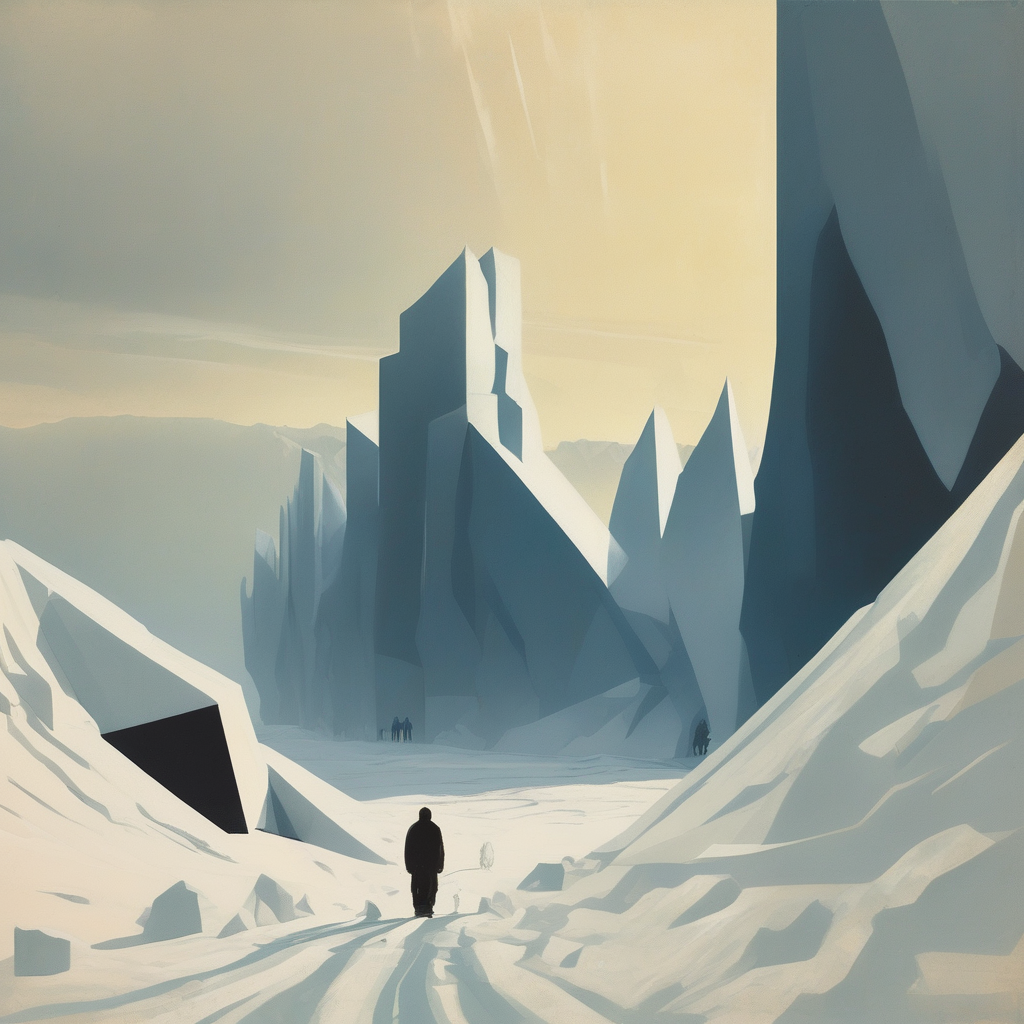

In [16]:
images

In [18]:
for i in range(1, 10):
    save_random_crop(images, save_name = f"antarctic{i}.jpg")